In [1]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
%matplotlib inline

from pymbar import timeseries

import calibration_tools as tools

DISCARD = 10
FAST = False

# DHFR salt distribution

In [2]:
files = ['../../calibration/sams/tip3p/out1.nc', '../../calibration/sams/tip3p/out2.nc', '../../calibration/sams/tip3p/out3.nc']
t3p = tools.AutoAnalyzeCalibration(files)

In [10]:
files = ['out1.nc', 'out2.nc', 'out3.nc']
nsalt = []
volume = []
for f in files:
    file = '../dhfr/' + f
    ncfile = Dataset(file,'r')
    volume.append(ncfile.groups['Sample state data']['volume'][:])
    nspecies = ncfile.groups['Sample state data']['species counts'][:]
    nanion = nspecies[:,2]
    nsalt.append(nanion)
    mu = ncfile.groups['Control parameters']['delta_chem'][:]
    nattemtped = float(ncfile.groups['Sample state data']['nattempted'][-1])
    naccepted = float(ncfile.groups['Sample state data']['naccepted'][-1])
    acceptance_prob = 100. * naccepted /nattemtped
    print(f, ': Mu = {0}, acceptance probability = {1:.3f}'.format(mu, acceptance_prob))
    ncfile.close()
volume = np.array(volume)
nsalt = np.array(nsalt)

out1.nc : Mu = 317.61297607421875, acceptance probability = 12.976
out2.nc : Mu = 317.61297607421875, acceptance probability = 12.735
out3.nc : Mu = 317.61297607421875, acceptance probability = 12.535


For each chemical potential, calculating the mean salt concentration as a function of iteration and using `pymbar`'s timeseries analysis to estimate the standard error on the mean.

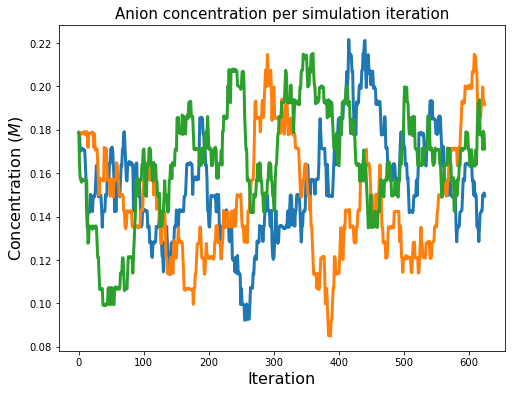

In [21]:
concentration = 1.0*nsalt/volume * 1.66054 # in M

plt.figure(figsize=[8,6])
plt.plot(concentration.T, lw=3)

plt.xlabel('Iteration', fontsize=16)
plt.ylabel('Concentration ($M$)', fontsize=16)
plt.title('Salt concentration per simulation iteration', fontsize=15)
plt.show()

#print('Equilibrium detected at iteration {0}'.format(t_equil+DISCARD))

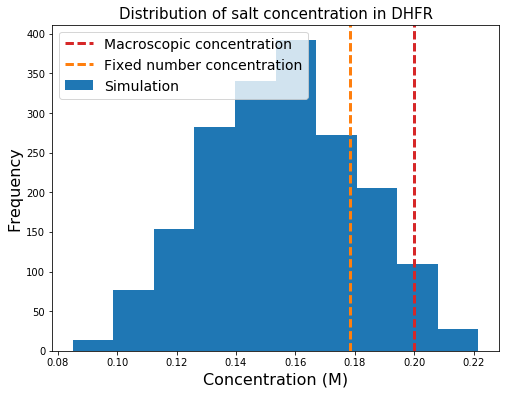

In [40]:
# The macroscopic concentration that is specified by the chemical potential
macro_conc = 0.2 #Salinator.predict_concentration(float(mu), fn=t3p.cumulative_free_energy, volume=t3p.average_volume)

# The effective concentration with fixed number of salt pairs
nmols = np.sum(nspecies[0,:])
water_conc = 55.4
conc_fixed_number = int(np.floor(nmols * macro_conc / water_conc)) / np.mean(volume) * 1.66054 

plt.figure(figsize=[8,6])
h = plt.hist(np.reshape(concentration, np.prod(concentration.shape)), label='Simulation')
plt.axvline(macro_conc, ls='--', color='C3', label='Macroscopic concentration', lw=3)
plt.axvline(conc_fixed_number, ls='--', color='C1', label='Fixed number concentration', lw=3)


plt.title('Distribution of salt concentration in DHFR', fontsize=15)
plt.ylabel('Frequency', fontsize=16)
plt.xlabel('Concentration (M)', fontsize=16)
plt.legend(fontsize=14)
plt.show()

In [50]:
nsalt.mean() /10.0

2.1861333333333333

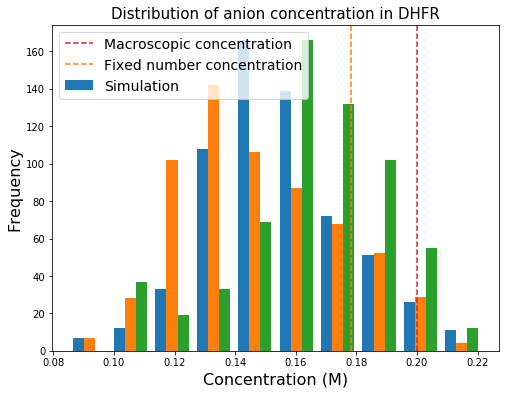

In [29]:
plt.figure(figsize=[8,6])
h = plt.hist(concentration.T, label='Simulation')
plt.axvline(macro_conc, ls='--', color='C3', label='Macroscopic concentration')
plt.axvline(conc_fixed_number, ls='--', color='C1', label='Fixed number concentration')


plt.title('Distribution of anion concentration in DHFR', fontsize=15)
plt.ylabel('Frequency', fontsize=16)
plt.xlabel('Concentration (M)', fontsize=16)
plt.legend(fontsize=14)
plt.show()